1/1 [==============================] - 0s 88ms/step


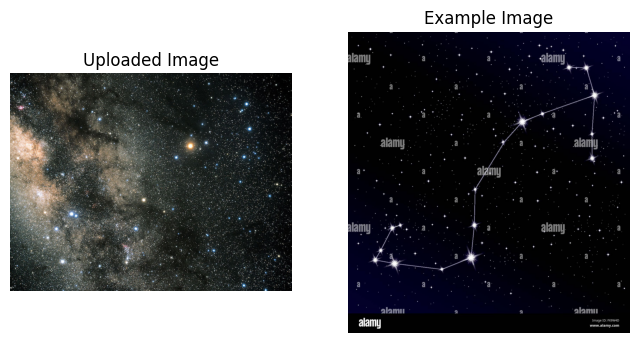

Predicted Constellation: Scorpio
Description: Scorpio is one of the zodiac constellations, often associated with a scorpion.


In [ ]:
# Import necessary libraries
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
from IPython.display import display, clear_output
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt

# Mount Google Drive
from google.colab import drive
drive.mount('/content/drive')

# Define image size and batch size
IMG_HEIGHT = 128
IMG_WIDTH = 128
BATCH_SIZE = 32

# Data Augmentation
datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    width_shift_range=0.1,
    height_shift_range=0.1,
    shear_range=0.1,
    zoom_range=0.1,
    horizontal_flip=True,
    fill_mode='nearest'
)

# Train and Validation Generators
train_generator = datagen.flow_from_directory(
    '/content/drive/MyDrive/datasetss/train',  # Replace with the path to your dataset
    target_size=(IMG_HEIGHT, IMG_WIDTH),
    batch_size=BATCH_SIZE,
    class_mode='categorical',
    color_mode='grayscale'
)

validation_generator = datagen.flow_from_directory(
    '/content/drive/MyDrive/datasetss/test',  # Replace with the path to your dataset
    target_size=(IMG_HEIGHT, IMG_WIDTH),
    batch_size=BATCH_SIZE,
    class_mode='categorical',
    color_mode='grayscale'
)

# Model Architecture
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(IMG_HEIGHT, IMG_WIDTH, 1)),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(256, activation='relu'),
    Dropout(0.5),
    Dense(4, activation='softmax')
])

# Compile the Model
model.compile(optimizer=Adam(learning_rate=0.001),  # Adjusted learning rate
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Define callbacks
early_stopping = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)
model_checkpoint = ModelCheckpoint('/content/drive/MyDrive/final_constellation_model.h5', save_best_only=True, monitor='val_accuracy', mode='max')

# Train the Model
history = model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // BATCH_SIZE,
    validation_steps=validation_generator.samples // BATCH_SIZE,
    epochs=30,  # Increased number of epochs
    validation_data=validation_generator,
    callbacks=[early_stopping, model_checkpoint]
)

# Save the best model
model.save('/content/drive/MyDrive/final_constellation_model.h5')

# Load the best model
model = tf.keras.models.load_model('/content/drive/MyDrive/final_constellation_model.h5')

# Define class names
class_names = ['Not a Constellation', 'Orion', 'Scorpio', 'Ursa Major']

# Define descriptions for each constellation
descriptions = {
    'Orion': 'Orion is a prominent constellation located on the celestial equator.',
    'Scorpio': 'Scorpio is one of the zodiac constellations, often associated with a scorpion.',
    'Ursa Major': 'Ursa Major, also known as the Great Bear, contains the Big Dipper asterism.',
    'Not a constellation':'Its not a constellation'
}

# Function to preprocess and predict image
def predict_image(img_path):
    img = Image.open(img_path).convert('L').resize((IMG_HEIGHT, IMG_WIDTH))
    img_array = np.array(img) / 255.0
    img_array = np.expand_dims(img_array, axis=0)
    img_array = np.expand_dims(img_array, axis=-1)  # Add channel dimension

    prediction = model.predict(img_array)
    predicted_class = np.argmax(prediction)
    return predicted_class

# Function to display uploaded image, prediction, example image, and description
def display_prediction(file_info):
    img_path = '/content/uploaded_image.jpg'
    with open(img_path, 'wb') as f:
        f.write(file_info['content'])

    # Predict constellation
    prediction_class = predict_image(img_path)
    predicted_class = class_names[prediction_class]

    # Display uploaded image
    img = Image.open(img_path)
    plt.figure(figsize=(8, 6))
    plt.subplot(1, 2, 1)
    plt.imshow(img)
    plt.axis('off')
    plt.title('Uploaded Image')

    # Display prediction
    plt.subplot(1, 2, 2)
    example_image_path = f'/content/drive/MyDrive/example/{predicted_class.lower()}_example.jpg'  # Adjust path to your example images
    example_img = Image.open(example_image_path)
    plt.imshow(example_img)
    plt.axis('off')
    plt.title('Example Image')

    plt.show()

    # Display description
    print(f'Predicted Constellation: {predicted_class}')
    print(f'Description: {descriptions.get(predicted_class, "No description available")}')

# Function to handle file upload
def on_file_upload(change):
    clear_output(wait=True)
    for name, file_info in file_upload.value.items():
        display_prediction(file_info)

# Define widgets
file_upload = widgets.FileUpload(
    accept='image/*',  # Accept images only
    multiple=False  # Single file upload
)

# Display widgets
file_upload.observe(on_file_upload, names='value')
display(file_upload)


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive
